## Self study data analysis parameter retrieval analysis
Specific problems:
* This is a single-participant study, thus data size is limited (~30)
* (Data can be interpreted in a longitudinal fashion)

Thus I want to test whether my analysis is any good for an idealized data set of this size.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import pandas as pd

#### Generate generic test data
Create data to answer these questions:
* If the effect of the treament obeyed my hypothesis, would I be able to tell?
* How well can I retrieve the parameters of generic random data?

Generate some Gaussian data sets:

(array([ 1.,  1.,  3.,  7.,  4.,  2.,  2.,  5.,  3.,  2.]),
 array([-0.42667924,  0.03658169,  0.49984262,  0.96310355,  1.42636449,
         1.88962542,  2.35288635,  2.81614728,  3.27940822,  3.74266915,
         4.20593008]),
 <a list of 10 Patch objects>)

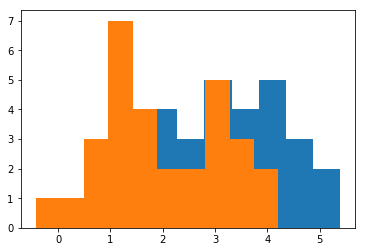

In [3]:
# Initialize random number generator
np.random.seed(123)

# True parameter values
true_control_mean = 2
true_control_sd = 1
true_treatment_mean = 3
true_treatment_sd = 1

# Size of dataset
size = 30

# Simulate outcome variable
control_data = np.random.normal(loc=true_control_mean, scale=true_control_sd, size=size)
treatment_data = np.random.normal(loc=true_treatment_mean, scale=true_treatment_sd, size=size)

#print(control_data)
plt.hist(treatment_data)
plt.hist(control_data)

# Limitations: This is continuous data, maybe discrete data would be better.

### Retrieve the parameters

In [3]:
with pm.Model() as model:
    # Uniform Priors
    control_mean = pm.Uniform('control_mean', -5, 5)
    control_sd = pm.Uniform('control_sd', 0.1, 10)
    treatment_mean = pm.Uniform('treatment_mean', -5, 5)
    treatment_sd = pm.Uniform('treatment_sd', 0.1, 10)    

    effect_mean = pm.Deterministic('effect_mean', treatment_mean - control_mean)

    # Define likelihood
    observed_control = pm.Normal(name='observed_control', 
                                  mu=control_mean,
                                  sd=control_sd,
                                  observed=control_data)
    
    observed_treament = pm.Normal(name='observed_treatment', 
                                  mu=treatment_mean,
                                  sd=treatment_sd,
                                  observed=treatment_data)                              
    print('Likelihood specified')

    trace = pm.sample(draws=10000, njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Likelihood specified


Average ELBO = -107.81:  85%|████████▌ | 170888/200000 [00:29<00:05, 5671.05it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -107.83

100%|██████████| 10000/10000 [00:22<00:00, 447.89it/s]


### Plot the posteriors

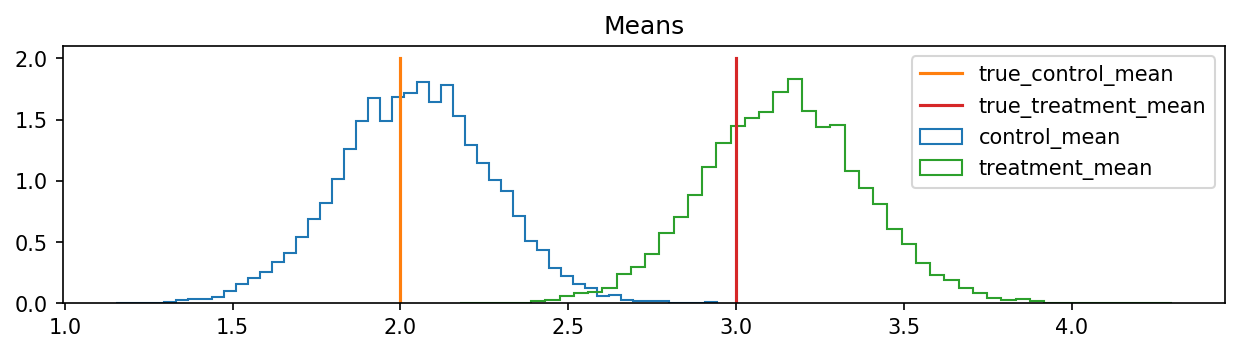

In [4]:
fig = plt.figure(figsize=(10, 5), dpi= 150)
mean_names = ['control_mean', 'treatment_mean']
true_vals = [true_control_mean, true_treatment_mean]
ax1= plt.subplot(211)
for i in range(0, len(mean_names)):
    plt.title('Means')
    data = trace[mean_names[i]]
    plt.hist(data, 50, histtype='step', normed=True, label=mean_names[i])
    plt.plot([true_vals[i]]*2, [0, 2], label='true_' + mean_names[i])
plt.legend(loc='best')

